# Introduction

We classify Iris flower species using a [support vector classifier](https://en.wikipedia.org/wiki/Support_vector_machine) and a [neural network](https://en.wikipedia.org/wiki/Neural_network), and compare their performance.

The famous [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set) is studied here. It consists of 150 samples, distributed equally among Iris setosa, Iris virginica, Iris versicolor. Four features were measured from each sample: sepal length, speal width, petal length, and petal width, in centimetres.

**keywords:** data science, machine learning, deep learning, predictive modelling, exploratory data analysis, model evaluation

# Retrieving the Dataset

We begin by importing the standard libraries for data science and machine learning tasks.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.color_palette("colorblind")

%matplotlib inline

The dataset is included in the [Seaborn](https://seaborn.pydata.org/) library. We can use the `.load_dataset()` function to view it as dataframe.

In [2]:
iris = sns.load_dataset("iris")

Let us look at the first few rows of the dataframe to have a better idea on the dataset.

<figure>
<img src="img/iris_head.jpg"
     width = 400
     height = 800
     >
</figure>

(screenshot of `iris.head()`)

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


The columns **sepal_length**, **sepal_width**, **petal_length**, and **petal_width** represent four numerical features for each sample. Let us look at the distribution of each feature by using `.describe()`.

<img src="img/iris_describe.jpg"
     width = 400
     height = 600
     >
     
(screenshot of `iris.describe()`)

In [4]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


It is worth noting that we have 150 records for each feature (from the **count** row of `iris.describe()`). This means there are no missing features (such as `np.NaN` and `None`) in this dataset.

Alternatively, we can use `.info()` to get the non-null count.

<img src="img/iris_info.jpg"
     width = 300
     height = 500
     >
     
(screenshot of `iris.info()`)

In [5]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


# Exploratory Data Analysis

Let us create some data visuals to understand the data better.

Say we want to explore the correlations for each pair of (numerical) features in our dataset. We can first calculate the correlations using the `.corr()` method.

<img src="img/iris_corr.jpg"
     width = 400
     height = 600
     >
     
(screenshot of `.corr()`)

In [6]:
iris.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


A heatmap helps us to identify which two features are more correlated.

<img src="img/sns_heatmap.jpg"
     width = 400
     height = 600
     >
     
(screenshot of `sns.heatmap`)

<AxesSubplot: >

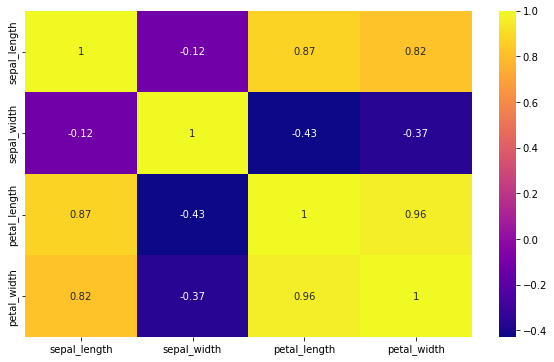

In [7]:
plt.figure(figsize = (10, 6))

sns.heatmap(iris.corr(),
            annot = True,
            cmap = "plasma"
           )

Let's create a pairplot.

<Figure size 864x432 with 0 Axes>

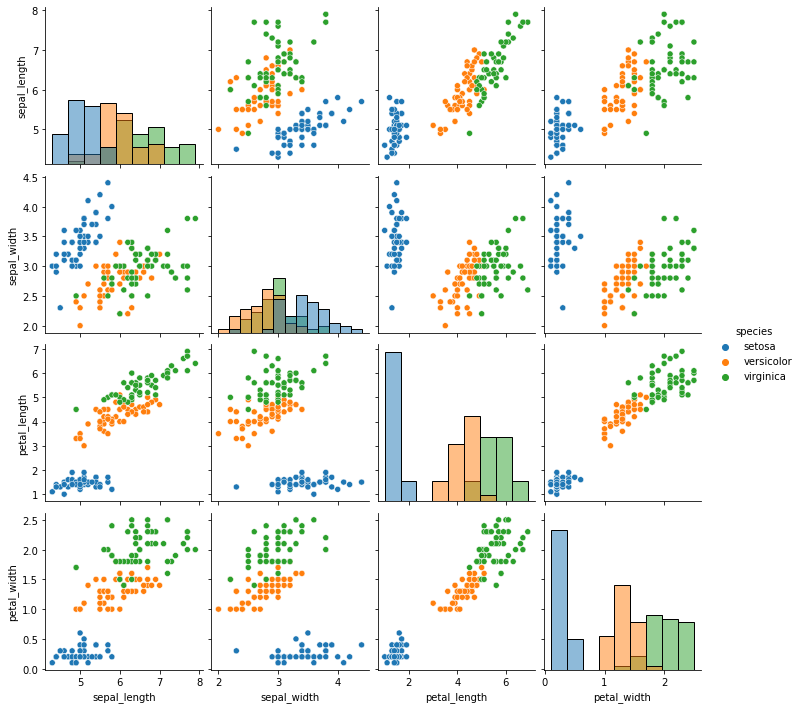

In [8]:
plt.figure( figsize = (12,6))

sns.pairplot(data = iris,
             hue = "species",
             diag_kind = "hist"
            )

In particular, this `pairplot` is saying that the class setosa is highly separable from the rest. Here is a screenshot of the `pairplot`:

<img src="img/sns_pairplot.jpg"
     width = 500
     height = 500
     >

Seaborn allows us to visualise how **sepal_length** and **sepal_width** are jointly distributed for the setotsa class. This is done by `.kdeplot()`.

<img src="img/setosa_kdeplot.jpg"
     width = 400
     height = 600
     >
     
(screenshot of `sns.kdeplot()`)

<AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>

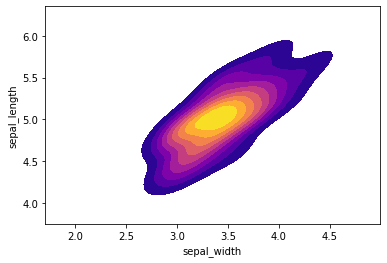

In [9]:
setosa = iris[iris["species"] == "setosa"]

sns.kdeplot(data = setosa,
            x = "sepal_width",
            y = "sepal_length",
            cmap = "plasma",
            fill = True,
            thresh = 0.09
           )

Thus, an average Iris setosa has sepal width 3.0--3.5 cm, and has sepal length 4.8--5.3 cm.

# Train-Test Split

We now divide our dataset into training set and testing set for our machine learning models.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [11]:
X = iris.drop("species", axis = 1)
y = iris["species"]

# Converting y into one-hot
encoder = LabelEncoder()
encoder.fit_transform(y)

# This is for SVC.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

However, Tensorflow prefers one-hot-encoded labels in classification tasks. Therefore, we need to address that.

In [12]:
'''
Prepare y_train, y_test for NN
'''

#Transform labels to normalized encoding.
y_train_nn = encoder.transform(y_train)

# Convert categorical variables into one-hot vectors
y_train_nn = pd.get_dummies(y_train_nn).values

# Repeat for y_test.
y_test_nn = encoder.transform(y_test)
y_test_nn = pd.get_dummies(y_test_nn).values

To illustrate:

<img src="img/y_train_nn_encoding.jpg"
     width = 200
     height = 300
     >

# Training a Model

We train two models here: a support vector machine, and a dense neural network.

## Support Vector Classifier (SVC)

We call the SVC model from `sklearn` and use `.fit()` to fit it to the training data.

In [13]:
from sklearn.svm import SVC

svc_model = SVC()

svc_model.fit(X_train, y_train)

SVC()

## Evaluating SVC

We create a confusion matrix and a classification report for our SVC.

<img src="img/svc_evaluation.jpg"
     width = 400
     height = 400
     >
     
(screenshot of the confusion matrix and classsification report for SVC)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix

In [15]:
y_pred_svc = svc_model.predict(X_test)

print(confusion_matrix(y_test, y_pred_svc))
print("\n")
print(classification_report(y_test, y_pred_svc))

[[14  0  0]
 [ 0 12  0]
 [ 0  4 15]]


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.75      1.00      0.86        12
   virginica       1.00      0.79      0.88        19

    accuracy                           0.91        45
   macro avg       0.92      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



As we can see, the SVC is a decent model.

# Dense Neural Network (NN)

In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Our neural network is a fully-connected one.

In [17]:
nn_model = Sequential()

# A good rule of thumb is that your first layer should match
# the same number of features for your NN.
nn_model.add(Dense(4, activation = "relu"))

nn_model.add(Dense(4, activation = "relu"))

# We are classifying 3 classes, so use "softmax".
nn_model.add(Dense(3, activation = "softmax"))

# Classification task uses "categorical_crossentropy".
nn_model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Here is the model summary.

<img src="img/nn_model_summary.jpg"
     width = 400
     height = 600
     >
     
(screenshot of `nn_model.summary()`)

We fit our neural network to the training data for 500 epochs, and add in a batch size of 50.

In [18]:
nn_model.fit(X_train.values, y_train_nn, batch_size=50, epochs=500)

Epoch 1/500
3/3 [==============================] - 1s 6ms/step - loss: 6.7795 - accuracy: 0.3429
Epoch 2/500
3/3 [==============================] - 0s 4ms/step - loss: 6.3892 - accuracy: 0.3429
Epoch 3/500
3/3 [==============================] - 0s 6ms/step - loss: 6.1339 - accuracy: 0.3429
Epoch 4/500
3/3 [==============================] - 0s 4ms/step - loss: 5.9452 - accuracy: 0.3429
Epoch 5/500
3/3 [==============================] - 0s 4ms/step - loss: 5.7569 - accuracy: 0.3429
Epoch 6/500
3/3 [==============================] - 0s 6ms/step - loss: 5.6077 - accuracy: 0.3429
Epoch 7/500
3/3 [==============================] - 0s 5ms/step - loss: 5.4614 - accuracy: 0.3429
Epoch 8/500
3/3 [==============================] - 0s 5ms/step - loss: 5.2988 - accuracy: 0.3429
Epoch 9/500
3/3 [==============================] - 0s 6ms/step - loss: 5.1854 - accuracy: 0.3429
Epoch 10/500
3/3 [==============================] - 0s 5ms/step - loss: 5.0524 - accuracy: 0.3429
Epoch 11/500
3/3 [===========

3/3 [==============================] - 0s 7ms/step - loss: 0.9124 - accuracy: 0.3429
Epoch 85/500
3/3 [==============================] - 0s 5ms/step - loss: 0.9015 - accuracy: 0.3524
Epoch 86/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8923 - accuracy: 0.3524
Epoch 87/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8838 - accuracy: 0.3810
Epoch 88/500
3/3 [==============================] - 0s 3ms/step - loss: 0.8736 - accuracy: 0.4095
Epoch 89/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8666 - accuracy: 0.4286
Epoch 90/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8586 - accuracy: 0.4381
Epoch 91/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8528 - accuracy: 0.4476
Epoch 92/500
3/3 [==============================] - 0s 5ms/step - loss: 0.8474 - accuracy: 0.4571
Epoch 93/500
3/3 [==============================] - 0s 4ms/step - loss: 0.8396 - accuracy: 0.4762
Epoch 94/500
3/3 [===============

3/3 [==============================] - 0s 3ms/step - loss: 0.6074 - accuracy: 0.6952
Epoch 168/500
3/3 [==============================] - 0s 4ms/step - loss: 0.6064 - accuracy: 0.6952
Epoch 169/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6053 - accuracy: 0.6952
Epoch 170/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6043 - accuracy: 0.6952
Epoch 171/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6035 - accuracy: 0.6952
Epoch 172/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6025 - accuracy: 0.6952
Epoch 173/500
3/3 [==============================] - 0s 5ms/step - loss: 0.6015 - accuracy: 0.6952
Epoch 174/500
3/3 [==============================] - 0s 6ms/step - loss: 0.6006 - accuracy: 0.6952
Epoch 175/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5997 - accuracy: 0.6952
Epoch 176/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5987 - accuracy: 0.6952
Epoch 177/500
3/3 [=====

3/3 [==============================] - 0s 6ms/step - loss: 0.5496 - accuracy: 0.7048
Epoch 250/500
3/3 [==============================] - 0s 6ms/step - loss: 0.5491 - accuracy: 0.7048
Epoch 251/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5484 - accuracy: 0.7048
Epoch 252/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5480 - accuracy: 0.7048
Epoch 253/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5475 - accuracy: 0.7048
Epoch 254/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5469 - accuracy: 0.7048
Epoch 255/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5466 - accuracy: 0.7048
Epoch 256/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5461 - accuracy: 0.7048
Epoch 257/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5456 - accuracy: 0.7048
Epoch 258/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5451 - accuracy: 0.7048
Epoch 259/500
3/3 [=====

3/3 [==============================] - 0s 4ms/step - loss: 0.5089 - accuracy: 0.7048
Epoch 332/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5086 - accuracy: 0.7048
Epoch 333/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5081 - accuracy: 0.7048
Epoch 334/500
3/3 [==============================] - 0s 5ms/step - loss: 0.5076 - accuracy: 0.7048
Epoch 335/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5073 - accuracy: 0.7048
Epoch 336/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5069 - accuracy: 0.7048
Epoch 337/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5065 - accuracy: 0.7048
Epoch 338/500
3/3 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.7048
Epoch 339/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5056 - accuracy: 0.7048
Epoch 340/500
3/3 [==============================] - 0s 3ms/step - loss: 0.5052 - accuracy: 0.7048
Epoch 341/500
3/3 [=====

3/3 [==============================] - 0s 8ms/step - loss: 0.4770 - accuracy: 0.7048
Epoch 414/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4764 - accuracy: 0.7048
Epoch 415/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4760 - accuracy: 0.7048
Epoch 416/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4757 - accuracy: 0.7048
Epoch 417/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4753 - accuracy: 0.7048
Epoch 418/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4749 - accuracy: 0.7048
Epoch 419/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4744 - accuracy: 0.7048
Epoch 420/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4737 - accuracy: 0.7048
Epoch 421/500
3/3 [==============================] - 0s 7ms/step - loss: 0.4733 - accuracy: 0.7048
Epoch 422/500
3/3 [==============================] - 0s 10ms/step - loss: 0.4731 - accuracy: 0.7048
Epoch 423/500
3/3 [====

3/3 [==============================] - 0s 7ms/step - loss: 0.4436 - accuracy: 0.7048
Epoch 496/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4428 - accuracy: 0.7048
Epoch 497/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4432 - accuracy: 0.7048
Epoch 498/500
3/3 [==============================] - 0s 5ms/step - loss: 0.4419 - accuracy: 0.7048
Epoch 499/500
3/3 [==============================] - 0s 6ms/step - loss: 0.4414 - accuracy: 0.7048
Epoch 500/500
3/3 [==============================] - 0s 8ms/step - loss: 0.4414 - accuracy: 0.7048


## Evaluating NN

We plot the loss, accuracy against epochs.

<img src="img/nn_loss_acc.jpg"
     width = 300
     height = 400
     >
     
(screenshot of `pd.DataFrame(nn_model.history.history).plot()`)

<AxesSubplot: >

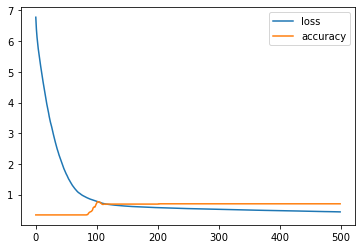

In [19]:
pd.DataFrame(nn_model.history.history).plot()

We have a nice trend here---the loss decreases steadily, and accuracy is oscillates around 80%.

Next, we create a confusion matrix and a classification report for our NN. Note that we need to convert the one-hot vectors back to the text-string labels. To illustrate:
     
<table>
  <tr>
    <td><img src="img/y_pred_nn_4-9.jpg" width=100 height=100></td>
      <td>$\xrightarrow[]{\mathrm{np.argmax}}$ </td>
      <td></td>
    <td><img src="img/y_pred_test_4-9.jpg" width=100 height=100></td>
      <td>$\xrightarrow[]{\mathrm{encoder.inverse_transform()}}$ </td>
      <td></td>
    <td><img src="img/y_pred_final_4-9.jpg" width=200 height=200></td>
  </tr>
 </table>

In [20]:
y_pred_nn = (nn_model.predict(X_test) > 0.5).astype("int32")

2/2 [==============================] - 0s 6ms/step


In [21]:
# Reversing pd.get_dummies
y_pred_nn = np.argmax(y_pred_nn, axis = 1)

In [22]:
# Transform labels back to original encoding.
y_pred_nn = encoder.inverse_transform(y_pred_nn)

We create a confusion matrix and a classification report for our SVC.

<img src="img/nn_evaluation.jpg"
     width = 400
     height = 400
     >
     
(screenshot of the confusion matrix and classsification report for NN)

In [23]:
print(confusion_matrix(y_test, y_pred_nn))
print("\n")
print(classification_report(y_test, y_pred_nn))

[[14  0  0]
 [ 0 12  0]
 [ 4 15  0]]


              precision    recall  f1-score   support

      setosa       0.78      1.00      0.88        14
  versicolor       0.44      1.00      0.62        12
   virginica       0.00      0.00      0.00        19

    accuracy                           0.58        45
   macro avg       0.41      0.67      0.50        45
weighted avg       0.36      0.58      0.44        45



Again, this is a decent model.

# Comparing SVC and NN

Let us obtain the classification reports in dictionary forms.

In [24]:
nn_report = classification_report(y_test, y_pred_nn, output_dict = True)
svc_report = classification_report(y_test, y_pred_svc, output_dict = True)

The following cell compares the performance of our SVC and NN.

In [25]:
# species = ['setosa', 'versicolor', 'virginica']
species = list(nn_report.keys())[0:3]

criteria = ["precision", "recall", "f1-score"]

nn_name = "Neural Network"
svc_name = "Support Vector Machine"

# This variable counts the number of times
# SVC beats NN.
svc_win_count = 0


for specie in species:
    for criterion in criteria:
        nn_result = nn_report[specie][criterion]
        svc_result = svc_report[specie][criterion]
        
        if nn_result > svc_result:
            print(f"For {specie}, {nn_name} performs better on {criterion}.")
        
        elif nn_result == svc_result:
            print(f"For {specie}, two models are on par with each other on {criterion}.")
            
        else:
            svc_win_count += 1
            print(f"For {specie}, {svc_name} performs better on {criterion}.")

print(f"SVC stands out in {svc_win_count} out of 9 aspects.")

For setosa, Support Vector Machine performs better on precision.
For setosa, two models are on par with each other on recall.
For setosa, Support Vector Machine performs better on f1-score.
For versicolor, Support Vector Machine performs better on precision.
For versicolor, two models are on par with each other on recall.
For versicolor, Support Vector Machine performs better on f1-score.
For virginica, Support Vector Machine performs better on precision.
For virginica, Support Vector Machine performs better on recall.
For virginica, Support Vector Machine performs better on f1-score.
SVC stands out in 7 out of 9 aspects.


# Thank You.